In [87]:
import random 
  
# Prints list of length 3 of random items from the given list. 
list1 = [1, 2, 3, 4, 5, 6]  
print(random.sample(list1, 3)) 

[6, 2, 3]


With Replacement: The unit once selected has a chance of appearing again


Without Replacement: The unit once selected cannot be selected again

In [14]:
import pandas as pd 

Online_Retail=pd.read_csv("/Users/nupuragrawal/downloads/data.csv")
print(Online_Retail.shape)

sample_data=Online_Retail.sample(n=100,replace="False")
print(sample_data.shape)

(569, 33)
(100, 33)


Parameters:

n : int, optional
Number of items from axis to return. Cannot be used with frac. Default = 1 if frac = None.

frac : float, optional
Fraction of axis items to return. Cannot be used with n.

replace : bool, default False
Sample with or without replacement.

weights : str or ndarray-like, optional
Default ‘None’ results in equal probability weighting. If passed a Series, will align with target object on index. Index values in weights not found in sampled object will be ignored and index values in sampled object not in weights will be assigned weights of zero. If called on a DataFrame, will accept the name of a column when axis = 0. Unless weights are a Series, weights must be same length as axis being sampled. If weights do not sum to 1, they will be normalized to sum to 1. Missing values in the weights column will be treated as zero. Infinite values not allowed.

random_state : int or numpy.random.RandomState, optional
Seed for the random number generator (if int), or numpy RandomState object.

axis : int or string, optional
Axis to sample. Accepts axis number or name. Default is stat axis for given data type (0 for Series and DataFrames).

In [49]:
df = pd.DataFrame({'Males': [60, 40, 80, 20],
                   'Females': [40, 50, 20, 10]},
                 index=['Computer Science', 'Electrical', 'Civil', 'Mechanical'])
df

,Males,Females
Computer Science,60,40
Electrical,40,50
Civil,80,20
Mechanical,20,10


In [50]:
df.sample(frac=0.5, replace=True)

,Males,Females
Mechanical,20,10
Electrical,40,50


In [53]:
df.sample(n=2)

,Males,Females
Mechanical,20,10
Civil,80,20


## Bootstrap sampling

/Users/nupuragrawal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


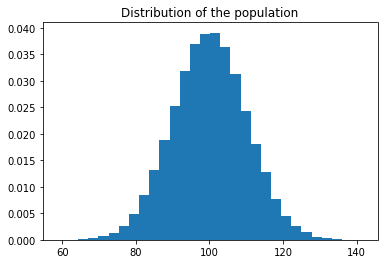

In [78]:
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

mean = 100
stdev = 10

population = np.random.normal(loc=mean, scale=stdev, size=50000)

# take 1k 'samples' from the larger population
samples=np.random.choice(population, 1000,replace=True)

# Plot the population
count, bins, ignored = plt.hist(population, 30, normed=True)

plt.title('Distribution of the population')
plt.show()


In [79]:
# calculate bootstrap estimates for the mean and standard deviation
mean_results = bs.bootstrap(samples, stat_func=bs_stats.mean)

stdev_results = bs.bootstrap(samples, stat_func=bs_stats.std)

In [86]:
samples.shape

(1000,)

In [80]:
print('Bootstrapped mean should be: {}'.format(mean))
print('\t' + str(mean_results))
print('')
print('Bootstrapped stdev should be: {}'.format(stdev))
print('\t' + str(stdev_results))

Bootstrapped mean should be: 100
	99.92417507665988    (99.30188802603685, 100.54241736313051)

Bootstrapped stdev should be: 10
	9.971818360750682    (9.541641713658713, 10.40712227556686)
